# Airbnb Housing Reviews - TextMining

### Group members: Kuangyi Zhang, Lanyixuan Xu, Jie Bao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

# I. Data Preprocessing

### Read the dataset

In [2]:
housing_reviews = pd.read_table("reviews.csv", header='infer', delimiter=",", na_values='NaN')

In [3]:
housing_reviews.shape

(132353, 7)

In [4]:
housing_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,rating,comments
0,1301530,13937403,6/8/14,55,Deborah,93,Great location downtown near everything! Host ...
1,192652,708419,11/10/11,99,Laura,97,"Stephanie was awesome! Highly recommended, gre..."
2,14081954,146698448,4/23/17,464,Jamison,100,The place was so cool. The whole family loved ...
3,9452418,75922280,5/23/16,706,Eamon,100,Anne is a very thoughtful host who left all th...
4,3385966,108126286,10/14/16,1143,Katie,97,"Chad's place is awesome! It's a quiet, clean, ..."


In [5]:
housing_reviews.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listing_id,132353,NaN,NaN,NaN,7.32167e+06,5.08661e+06,2384,2.73061e+06,6.88433e+06,1.19731e+07,1.85981e+07
id,132353,NaN,NaN,NaN,8.26275e+07,4.17666e+07,849,4.85532e+07,8.64855e+07,1.14583e+08,1.51007e+08
date,132353,2267,3/19/17,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewer_id,132353,NaN,NaN,NaN,3.96426e+07,3.28041e+07,55,1.19079e+07,3.12252e+07,6.14423e+07,1.29263e+08
reviewer_name,132353,22527,Michael,1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,132353,NaN,NaN,NaN,94.834,4.5955,0,93,96,98,100
comments,132206,130167,The host canceled this reservation the day bef...,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop the missing value 

In [6]:
drop_rating_index = housing_reviews.index[housing_reviews['rating'] == 0]
drop_rating_index.tolist()
len(drop_rating_index)

43

In [7]:
drop_rating_index

Int64Index([  4130,   4481,   5888,  13391,  18099,  22288,  26113,  34279,
             41897,  43742,  44443,  57679,  58046,  61173,  64863,  65453,
             69640,  71573,  72794,  74187,  75437,  76131,  78542,  79317,
             91456,  92856,  94455,  96110, 101706, 104714, 111353, 113755,
            121041, 123545, 124217, 125056, 125250, 126668, 126776, 130801,
            130930, 131579, 131691],
           dtype='int64')

In [8]:
housing_reviews[4125:4132]

,listing_id,id,date,reviewer_id,reviewer_name,rating,comments
4125,7803642,113971997,11/14/16,908958,Mitch,92,The space was just what I needed for a weekend...
4126,220660,4117595,4/11/13,909738,Dan,95,"Like the other reviews posted, I absolutely en..."
4127,4092283,25912841,1/29/15,909780,Adam,97,Jessica's place is awesome. Great location in ...
4128,3809530,75935478,5/23/16,909817,Jamar,99,Laura did a great job of welcoming me to her a...
4129,44020,15846393,7/16/14,909877,Aaron,78,The patio/deck in back absolutely makes this r...
4130,16517889,138331381,3/19/17,910034,Matthew,0,Great place to stay! would highly recommend !
4131,7659968,139294981,3/24/17,910122,Lisa,100,These hosts are great at communicating. Their...


In [9]:
housing_reviews = housing_reviews.drop(housing_reviews.index[drop_rating_index])
housing_reviews.shape

(132310, 7)

In [10]:
housing_reviews = housing_reviews[~housing_reviews['comments'].isnull()] 
housing_reviews = housing_reviews[~housing_reviews['rating'].isnull()] 
housing_reviews.shape

(132163, 7)

### Separate into test and target variables

In [11]:
reviews_target = housing_reviews['rating']
reviews_x = housing_reviews[['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
housing_reviews['rating'].describe()

count    132163.000000
mean         94.865938
std           4.266281
min          20.000000
25%          93.000000
50%          96.000000
75%          98.000000
max         100.000000
Name: rating, dtype: float64

In [12]:
reviews_target

0          93
1          97
2         100
3         100
4          97
5          92
6          91
7          98
8          98
9          90
10         95
11         93
12         90
13         99
14         96
15         97
16         93
17         94
18         96
19         96
20         98
21         98
22         99
23         95
24         95
25         93
26         92
27         95
28         98
29         92
         ... 
132323    100
132324     94
132325    100
132326    100
132327     95
132328     98
132329    100
132330     96
132331     87
132332     92
132333     87
132334     84
132335     99
132336     94
132337    100
132338     90
132339    100
132340     96
132341    100
132342    100
132343    100
132344     97
132345     94
132346    100
132347     97
132348    100
132349    100
132350     99
132351     97
132352     94
Name: rating, Length: 132163, dtype: int64

In [13]:
df = pd.DataFrame()
df['rating'], bins = pd.qcut(reviews_target, 5, labels=np.arange(5) + 1 , retbins = True)

In [14]:
df

,rating
0,2
1,3
2,5
3,5
4,3
5,1
6,1
7,4
8,4
9,1


In [38]:
df.rating = pd.Categorical(df.rating)
df['code'] = df.rating.cat.codes
reviews_target = df.rating.astype('category').cat.codes
len(reviews_target)

132163

In [39]:
reviews_target

0         1
1         2
2         4
3         4
4         2
5         0
6         0
7         3
8         3
9         0
10        1
11        1
12        0
13        4
14        2
15        2
16        1
17        1
18        2
19        2
20        3
21        3
22        4
23        1
24        1
25        1
26        0
27        1
28        3
29        0
         ..
132323    4
132324    1
132325    4
132326    4
132327    1
132328    3
132329    4
132330    2
132331    0
132332    0
132333    0
132334    0
132335    4
132336    1
132337    4
132338    0
132339    4
132340    2
132341    4
132342    4
132343    4
132344    2
132345    1
132346    4
132347    2
132348    4
132349    4
132350    4
132351    2
132352    1
Length: 132163, dtype: int8

In [40]:
print pd.value_counts(reviews_target)

1    32213
2    32029
0    28626
4    21791
3    17504
dtype: int64


In [41]:
reviews_target = reviews_target.iloc[0:132163] + 1 
reviews_target

0         2
1         3
2         5
3         5
4         3
5         1
6         1
7         4
8         4
9         1
10        2
11        2
12        1
13        5
14        3
15        3
16        2
17        2
18        3
19        3
20        4
21        4
22        5
23        2
24        2
25        2
26        1
27        2
28        4
29        1
         ..
132323    5
132324    2
132325    5
132326    5
132327    2
132328    4
132329    5
132330    3
132331    1
132332    1
132333    1
132334    1
132335    5
132336    2
132337    5
132338    1
132339    5
132340    3
132341    5
132342    5
132343    5
132344    3
132345    2
132346    5
132347    3
132348    5
132349    5
132350    5
132351    3
132352    2
Length: 132163, dtype: int8

In [42]:
print pd.value_counts(reviews_target)

2    32213
3    32029
1    28626
5    21791
4    17504
dtype: int64


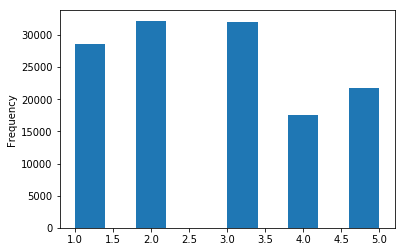

In [43]:
%matplotlib inline
reviews_target.plot(kind="hist", bins=10)

# 2. Document Text Mining Preprocessing

### 2.1 Functions used for preprocessing the text and parsing

In [21]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

In [22]:
#the words which appear frequently in the document
words_to_remove=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [23]:
# Remove stopwords, tokenize and stemming
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem.porter import PorterStemmer
def clean_my_data(text):
    stemmer = PorterStemmer()
    clean_text=[]
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    container=[]
    for words in tagged:

        if (words[1][0] == 'N' or words[1][0]=='J' or words[1][0] == 'V') and (words[1][0] not in words_to_remove):
            container.append(words[0])
    for words in container:
        word = stemmer.stem(words)
        clean_text.append(word)
    return ' '.join(clean_text)

In [24]:
from bs4 import BeautifulSoup
comments = np.array(reviews_x['comments'])
size  = len(comments)
print size

132163


In [25]:
clean_text = []
number = 0
for comment in comments:
    text = BeautifulSoup(comment).get_text()
    text = clean_my_data(text, "lxml")
    clean_text.append(text)
    if(number % 5000 == 0):
        print number, "for", 100*(number/float(size)), "%"
    number += 1

/Users/Jie/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/Jie/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


0 for 0.0 %


/Users/Jie/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


5000 for 3.78320710032 %
10000 for 7.56641420065 %
15000 for 11.349621301 %
20000 for 15.1328284013 %
25000 for 18.9160355016 %
30000 for 22.6992426019 %
35000 for 26.4824497023 %
40000 for 30.2656568026 %
45000 for 34.0488639029 %
50000 for 37.8320710032 %
55000 for 41.6152781036 %
60000 for 45.3984852039 %
65000 for 49.1816923042 %
70000 for 52.9648994045 %


/Users/Jie/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


75000 for 56.7481065048 %
80000 for 60.5313136052 %
85000 for 64.3145207055 %
90000 for 68.0977278058 %
95000 for 71.8809349061 %
100000 for 75.6641420065 %
105000 for 79.4473491068 %
110000 for 83.2305562071 %
115000 for 87.0137633074 %
120000 for 90.7969704078 %
125000 for 94.5801775081 %


/Users/Jie/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: "/" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


130000 for 98.3633846084 %


In [26]:
print clean_text[10]

great place great host excel commun process


In [27]:
comments[10]

'Great place and a great host.  Excellent communication throughout the process.'

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
import cPickle as pickle

cv = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000)
cv_fit = cv.fit_transform(clean_text)
cv_fit

<132163x5000 sparse matrix of type '<type 'numpy.int64'>'
	with 3371234 stored elements in Compressed Sparse Row format>

In [29]:
len(cv_fit.toarray()[0])

5000

In [30]:
print(cv_fit.toarray().sum(axis=0))

[986  38  74 ... 156  51  71]


In [31]:
top5000words = cv.get_feature_names()
print(top5000words[0:1000])

[u'10', u'10min', u'11', u'12', u'15', u'15min', u'1st', u'20', u'20min', u'24', u'25', u'2nd', u'30', u'35', u'40', u'45', u'4th', u'90', u'aaron', u'abandon', u'abbi', u'abbiamo', u'abend', u'aber', u'abil', u'abl', u'abnb', u'abod', u'abov', u'absenc', u'absolut', u'abund', u'ac', u'acc', u'accent', u'accept', u'acces', u'acceso', u'access', u'accessori', u'accid', u'accomad', u'accomid', u'accommod', u'accommodating', u'accomod', u'accompani', u'accord', u'account', u'accueil', u'accueillant', u'accueilli', u'accur', u'accus', u'accustom', u'acc\xec', u'acogedor', u'acquaint', u'act', u'action', u'activ', u'actual', u'ad', u'adam', u'adapt', u'add', u'addison', u'addit', u'address', u'adem\xec\xe1', u'adequ', u'adi', u'adjac', u'adjoin', u'adjust', u'admir', u'admit', u'ador', u'adorn', u'adress', u'adriana', u'adult', u'advanc', u'advantag', u'adventur', u'advertis', u'advic', u'advis', u'ae', u'aeropuerto', u'aesthet', u'affect', u'affection', u'afford', u'afraid', u'afri', u'afr

In [32]:
# Save the model
joblib.dump(cv, 'CountVectorizer.pkl') 

### Create features using Scikit Learn TFIDF 

In [33]:
#TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_trans= TfidfTransformer()
cv_tfidf= tfidf_trans.fit_transform(cv_fit)

# model saving
joblib.dump(tfidf_trans, 'tfidf_trans.pkl') 

['tfidf_trans.pkl']

In [36]:
cv_tfidf.shape

(132163, 5000)

# 3. Classification model

### Split into training and testing data

In [44]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cv_tfidf, reviews_target, test_size=0.2, random_state=35)
print x_train.shape, x_test.shape, y_train.shape, y_test.shape 

(105730, 5000) (26433, 5000) (105730,) (26433,)


In [45]:
#The performance metrices of various algorithm
accuracy= pd.DataFrame()
Algorith=[]
Accuracy=[]

In [46]:
from  sklearn.metrics import log_loss, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

/Users/Jie/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Decision Tree

In [47]:
treeclf = DecisionTreeClassifier(criterion='entropy')
parameters = {
    'max_depth': [20, 40, 50, 80, 100],
    'min_samples_split': [4, 6, 10, 14]
}
gs_decisionTree = GridSearchCV(treeclf, parameters, verbose=1, cv=5, scoring='accuracy')
%time _ = gs_decisionTree.fit(x_train, y_train)
Algorith.append('Decision Tree')
Accuracy.append(gs_decisionTree.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 85.9min finished


CPU times: user 1h 26min 5s, sys: 29 s, total: 1h 26min 34s
Wall time: 1h 27min 20s


In [48]:
print "The best parameters: %s" %gs_decisionTree.best_params_
print "The best accuracy result: %s" %abs(gs_decisionTree.best_score_)

The best parameters: {'min_samples_split': 14, 'max_depth': 80}
The best accuracy result: 0.308048803556


### Naïve Bayes

In [49]:
mnbclf = MultinomialNB()
parameters = {
    'fit_prior': [True, False],
    'alpha': np.linspace(0.0001, 5, 10)
}
gs_MultinomialNB = GridSearchCV(mnbclf, parameters, verbose=1, cv=5, scoring='accuracy')
%time _ = gs_MultinomialNB.fit(x_train, y_train)

Algorith.append('Naïve Bayes')
Accuracy.append(gs_MultinomialNB.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 7 s, sys: 1.13 s, total: 8.13 s
Wall time: 8.2 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished


In [50]:
print "The best parameters: %s" %gs_MultinomialNB.best_params_
print "The best accuracy result: %s" %abs(gs_MultinomialNB.best_score_)

The best parameters: {'alpha': 0.0001, 'fit_prior': True}
The best accuracy result: 0.495677669536


### Random Forest

In [51]:
rfclf = RandomForestClassifier(criterion='entropy')
parameters = {
    'min_samples_leaf': [2, 4, 6, 10],
    'max_depth':[40, 50, 80, 100],
    'max_features':[40, 50, 80]
}
gs_RandomForest = GridSearchCV(rfclf, parameters, verbose=1, cv=5, scoring='accuracy')
%time _ = gs_RandomForest.fit(x_train, y_train)

Algorith.append('Random Forest')
Accuracy.append(gs_RandomForest.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 20.1min finished


CPU times: user 19min 53s, sys: 14 s, total: 20min 7s
Wall time: 20min 8s


In [52]:
print "The best parameters: %s" %gs_RandomForest.best_params_
print "The best accuracy result: %s" %abs(gs_RandomForest.best_score_)

The best parameters: {'max_features': 40, 'max_depth': 100, 'min_samples_leaf': 10}
The best accuracy result: 0.375333396387


### Gradient Boosting

In [210]:
gbclf= GradientBoostingClassifier()
parameters = {
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_features':[40, 50, 80]
}

gs_GradientBoosting = GridSearchCV(gbclf, parameters, verbose=1, cv=5, scoring='accuracy')
%time _ = gs_GradientBoosting.fit(x_train, y_train)

Algorith.append('Gradient Boost')
Accuracy.append(gs_GradientBoosting.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 17.7min finished


CPU times: user 16min 29s, sys: 1min 37s, total: 18min 7s
Wall time: 18min 9s


In [211]:
print "The best parameters: %s" %gs_GradientBoosting.best_params_
print "The best accuracy result: %s" %abs(gs_GradientBoosting.best_score_)

The best parameters: {'max_features': 50, 'min_samples_split': 2}
The best accuracy result: 0.431832803512


### Regression

In [212]:
parameters = {
    'penalty': ['l1','l2'],
    'C': [1e-5, 1, 1e5]
}
rgclf = linear_model.LogisticRegression()
gs_Regression = GridSearchCV(rgclf, parameters, verbose=1, cv=5, scoring='accuracy')

%time _ = gs_Regression.fit(x_train, y_train)
Algorith.append('Regression')
Accuracy.append(gs_Regression.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 31.6min finished


CPU times: user 59min 38s, sys: 31.6 s, total: 1h 9s
Wall time: 31min 48s


In [213]:
print "The best parameters: %s" %gs_Regression.best_params_
print "The best accuracy result: %s" %abs(gs_Regression.best_score_)

The best parameters: {'penalty': 'l1', 'C': 1}
The best accuracy result: 0.514428171359


### Dataframe showing the performance metrices of the algorithms

In [214]:
accuracy['Algorith']= Algorith
accuracy['Accuracy']= Accuracy
print(accuracy)

         Algorith  Accuracy
0   Decision Tree  0.306795
1     Naïve Bayes  0.496566
2   Random Forest  0.363751
3  Gradient Boost  0.431833
4      Regression  0.514428


# 4. Use best parameters to build the models 

In [53]:
prediction = dict()

### Decision Tree

In [54]:
tree_clf = DecisionTreeClassifier(criterion='entropy', min_samples_split = 10, max_depth = 10)
model_dt = tree_clf.fit(x_train, y_train)
prediction['DecisionTree'] = model_dt.predict(x_test)

### Naïve Bayes

In [55]:
nb_clf = MultinomialNB(alpha=0.556, fit_prior = False)
model_nb = nb_clf.fit(x_train, y_train)
prediction['NaiveBayes'] = model_nb.predict(x_test)

### Random Forest

In [56]:
rf_clf = RandomForestClassifier(criterion='entropy', max_features = 25, max_depth = 40, min_samples_leaf = 4)
model_rf = rf_clf.fit(x_train, y_train)
prediction['RandomForest'] = model_rf.predict(x_test)

### Gradient Boosting 

In [57]:
gb_clf= GradientBoostingClassifier(min_samples_split = 2, max_features = 50)
model_gb = gb_clf.fit(x_train, y_train)
prediction['GradientBoosting'] = model_gb.predict(x_test)

### Regression

In [58]:
rg_clf = linear_model.LogisticRegression(C=1, penalty='l1')
model_rg = rg_clf.fit(x_train, y_train)
prediction['Regression'] = model_rg.predict(x_test)

### Results 

In [59]:
from  sklearn.metrics import accuracy_score
print accuracy_score(y_test, prediction['DecisionTree'])
print accuracy_score(y_test, prediction['NaiveBayes'])
print accuracy_score(y_test, prediction['RandomForest'])
print accuracy_score(y_test, prediction['GradientBoosting'])
print accuracy_score(y_test, prediction['Regression'])

0.27170582226762
0.49271743653766126
0.34891991071766354
0.4296901600272387
0.514508379676919


### Save the model for the best result

In [60]:
joblib.dump(model_rg, 'Regression_Predict_Rating.pkl')

['Regression_Predict_Rating.pkl']